# Lab 2

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Import and process data

In [212]:
data_train = pd.read_csv('train_motion_data.csv')
data_test = pd.read_csv('test_motion_data.csv')

In [213]:
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
train_mask = is_number(data_train.dtypes)
test_mask = is_number(data_train.dtypes)

print('No gaps' if pd.api.types.is_numeric_dtype(data_train) and pd.api.types.is_numeric_dtype(data_test) else 'Replace some data in column', data_train.columns[~train_mask], data_test.columns[~test_mask])

Replace some data in column Index(['Class'], dtype='object') Index(['Class'], dtype='object')


Replace data that first column will be a Class data

In [214]:
data_train = data_train[['Class'] + [x for x in data_train.columns if x != 'Class']]
data_test = data_test[['Class'] + [x for x in data_test.columns if x != 'Class']]

Separate data for their classes

In [215]:
train_normal = data_train.loc[data_train['Class'] == 'NORMAL']
train_slow = data_train.loc[data_train['Class'] == 'SLOW']
train_aggressive = data_train.loc[data_train['Class'] == 'AGGRESSIVE']

test_normal = data_test.loc[data_test['Class'] == 'NORMAL']
test_slow = data_test.loc[data_test['Class'] == 'SLOW']
test_aggressive = data_test.loc[data_test['Class'] == 'AGGRESSIVE']

Delete some data in swiching mode period

In [216]:
Trash = 10

train_slow = train_slow.iloc[Trash:]
train_slow = train_slow.iloc[:-Trash]

test_slow = test_slow.iloc[Trash:]
test_slow = test_slow.iloc[:-Trash]

train_normal = train_normal.iloc[Trash:]
train_normal = train_normal.iloc[:-Trash]

test_normal = test_normal.iloc[Trash:]
test_normal = test_normal.iloc[:-Trash]

train_aggressive = train_aggressive.iloc[Trash:]
train_aggressive = train_aggressive.iloc[:-Trash]

test_aggressive = test_aggressive.iloc[Trash:]
test_aggressive = test_aggressive.iloc[:-Trash]

In [217]:
data_train.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


### Separating for traning and test dataset

In [218]:
X_train = data_train.iloc[:, 1:7]
Y_train = data_train.iloc[:, 0]
X_test = data_test.iloc[:, 1:7]
Y_test = data_test.iloc[:, 0]

In [219]:
labelencoder_X = LabelEncoder()
labelencoder_Y = LabelEncoder()

Y_train = labelencoder_Y.fit_transform(Y_train) 
Y_test = labelencoder_Y.transform(Y_test) 

In [220]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)
X_test, Y_test = shuffle(X_test, Y_test, random_state=42)

In [221]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [222]:
Y_train

array([1, 2, 2, ..., 1, 2, 2])

# Principal component analysis

In [223]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

pca = PCA()
X_pca = pca.fit_transform(X_std)

In [224]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

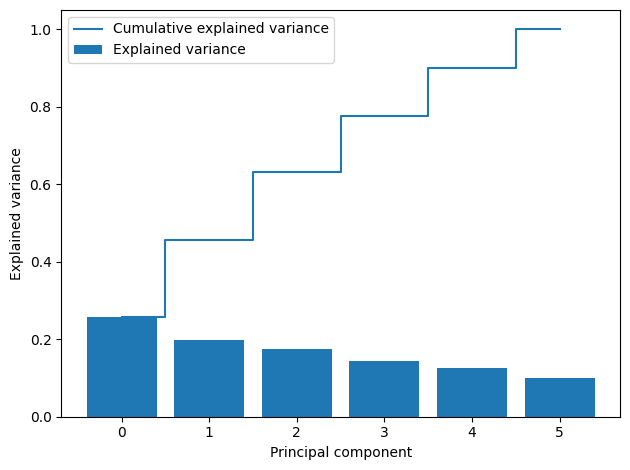

In [225]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [226]:
y = Y_train

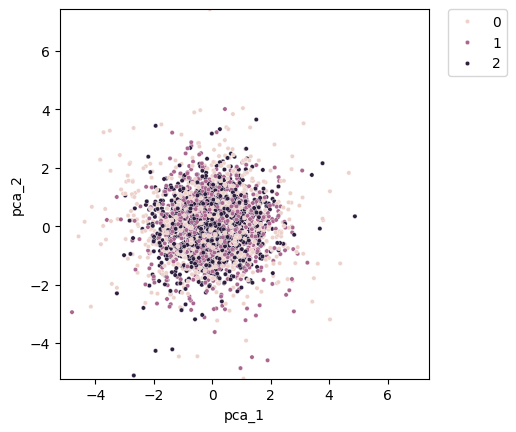

In [227]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min(), pca_result.max())
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# t-distributed Stochastic Neighbor Embedding

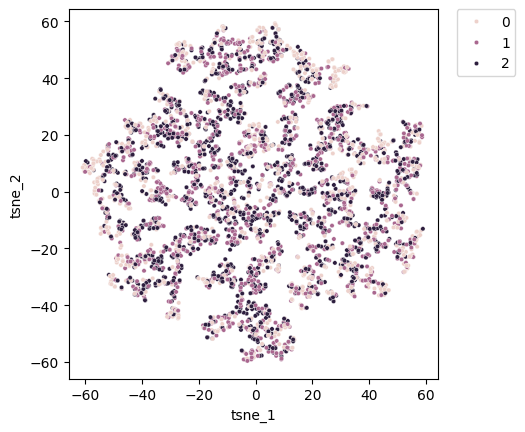

In [228]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_train)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# Color clustering

In [229]:
import cv2
from skimage.io import imread
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
n_colors = 64
snap =  imread('composite.jpg')
snap = np.array(snap, dtype=np.float64) / 255
unique_colors=len(np.unique(snap))

In [230]:
w, h, d = original_shape = tuple(snap.shape)
image_array = np.reshape(snap, (w * h, d))

In [231]:
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

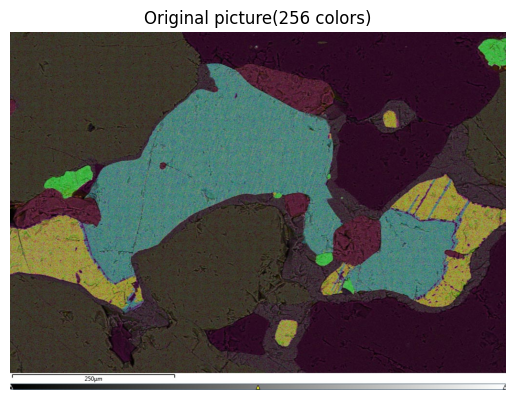

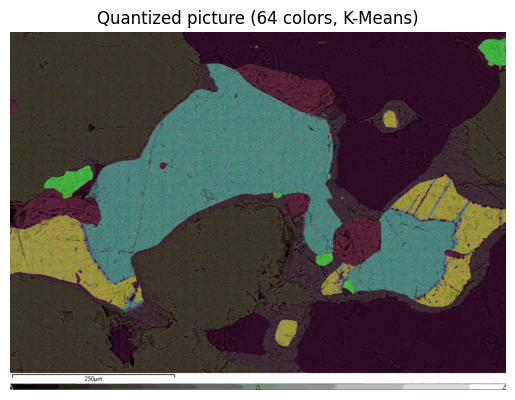

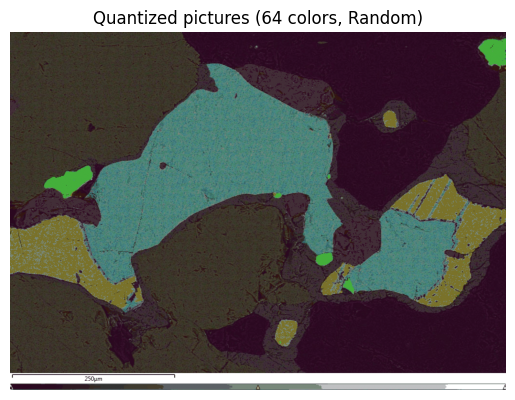

In [232]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Original picture({unique_colors} colors)")
plt.imshow(snap)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized picture ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized pictures ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

# Text analys

## Import data

In [233]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
Text_data = pd.read_csv('data_amazon.csv')


In [234]:
Text_data

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
49333,Dress felt and fit great. I got lots of compl...,Loved the color!!! Dress fit great and I got ...,5.0,Dresses,0.0,0.0,1.0,0.0,0.0
49334,Loved the dress but poor quality,This dress looked great and I loved the materi...,2.0,Dresses,1.0,0.0,0.0,0.0,1.0
49335,"Cute dress, didn't fit",Wanted this dress to work it didn't. It is ver...,1.0,Dresses,0.0,1.0,0.0,0.0,0.0
49336,Very cute!,No complaints othe than the zipper gets stuck ...,4.0,Dresses,0.0,0.0,0.0,0.0,1.0


In [235]:
Text_data = Text_data.iloc[:, 1:3].dropna()

In [236]:
Text_data

,Review,Cons_rating
0,Absolutely wonderful - silky and sexy and comf...,4.0
1,Love this dress! it's sooo pretty. i happene...,5.0
2,I had such high hopes for this dress and reall...,3.0
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0
4,This shirt is very flattering to all due to th...,5.0
...,...,...
49333,Loved the color!!! Dress fit great and I got ...,5.0
49334,This dress looked great and I loved the materi...,2.0
49335,Wanted this dress to work it didn't. It is ver...,1.0
49336,No complaints othe than the zipper gets stuck ...,4.0


In [237]:
from collections import Counter
Counter(Text_data['Cons_rating'])

Counter({4.0: 8104, 5.0: 27783, 3.0: 5307, 2.0: 3303, 1.0: 3798})

In [238]:
X_text_train = Text_data.iloc[:, 0] #Review
Y_text_train = Text_data.iloc[:, 1] #Raiting

In [239]:
X_text_train

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
49333    Loved the color!!!  Dress fit great and I got ...
49334    This dress looked great and I loved the materi...
49335    Wanted this dress to work it didn't. It is ver...
49336    No complaints othe than the zipper gets stuck ...
49337    The fabric was really nice, I'm a L and it fit...
Name: Review, Length: 48295, dtype: object

In [240]:
Y_text_train

0        4.0
1        5.0
2        3.0
3        5.0
4        5.0
        ... 
49333    5.0
49334    2.0
49335    1.0
49336    4.0
49337    5.0
Name: Cons_rating, Length: 48295, dtype: float64

In [241]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler()

X_text_simpl, Y_text_simpl = undersampler.fit_resample(np.array(X_text_train).reshape(-1, 1), np.array(Y_text_train).reshape(-1, 1))
Text_data_simp = pd.DataFrame({'Review': X_text_simpl.reshape(Y_text_simpl.shape), 'Cons_rating': Y_text_simpl})

In [242]:
Counter(Text_data_simp['Cons_rating'])

Counter({1.0: 3303, 2.0: 3303, 3.0: 3303, 4.0: 3303, 5.0: 3303})

## Visualization

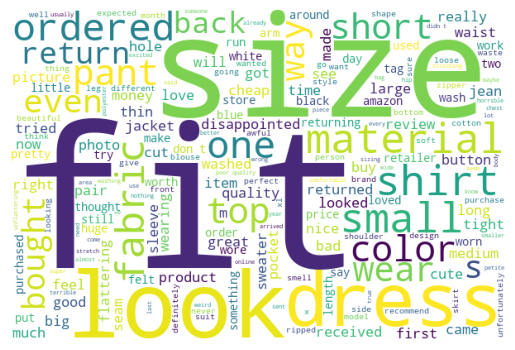

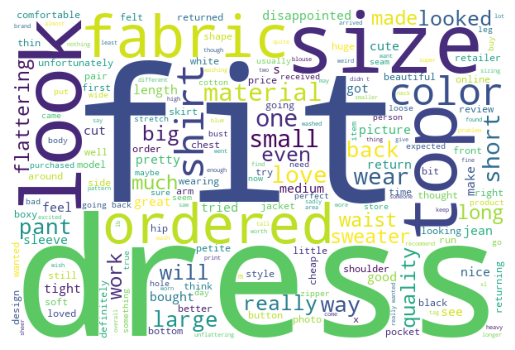

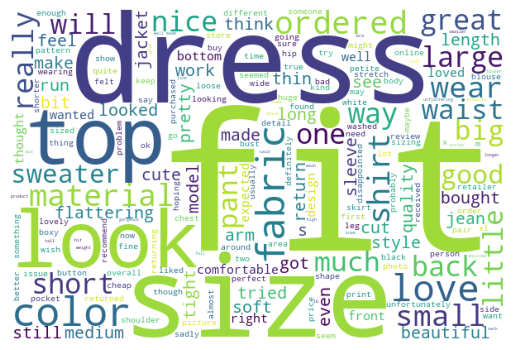

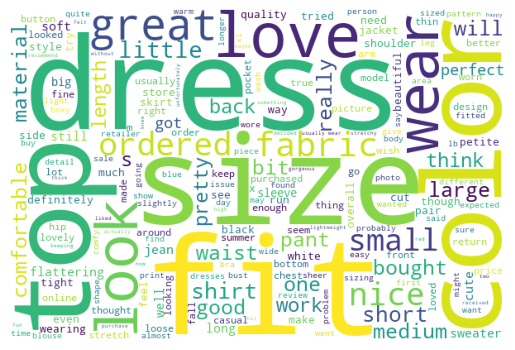

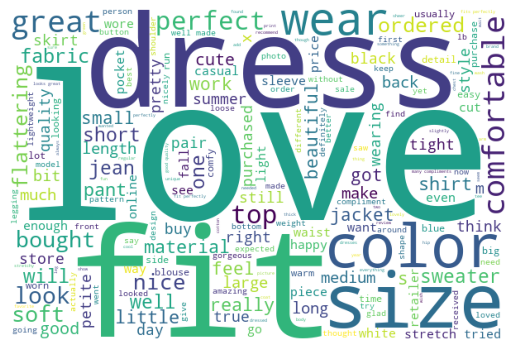

In [243]:
def visualize(label):
    text = ''
    for msg in Text_data_simp[Text_data_simp['Cons_rating'] == label]['Review']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

for i in range(5):
    i+=1
    visualize(i)

## Text cleaning and vectorization

In [248]:
from sklearn.model_selection import train_test_split
X_text_train, X_text_test, Y_text_train, Y_text_test = train_test_split(Text_data_simp['Review'], Text_data_simp['Cons_rating'], test_size=0.20)

In [249]:
labelencoder_text = LabelEncoder()
Y_text_train = labelencoder_text.fit_transform(Y_text_train) 
Y_text_test = labelencoder_text.transform(Y_text_test) 

In [250]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X_text_train_transformed = vectorizer.fit_transform(X_text_train)
X_text_test_transformed = vectorizer.transform(X_text_test)

## Random Forest

In [251]:
from sklearn.ensemble import RandomForestClassifier
model_RFC_text = RandomForestClassifier(random_state=666,criterion='gini')
model_RFC_text.fit(X_text_train_transformed, Y_text_train)
pred_RFC_text = model_RFC_text.predict(X_text_test_transformed)
print(classification_report(Y_text_test,pred_RFC_text))
print(accuracy_score(Y_text_test,pred_RFC_text))

              precision    recall  f1-score   support

           0       0.47      0.65      0.55       637
           1       0.36      0.27      0.31       647
           2       0.33      0.21      0.26       673
           3       0.42      0.30      0.35       680
           4       0.49      0.76      0.60       666

    accuracy                           0.44      3303
   macro avg       0.42      0.44      0.41      3303
weighted avg       0.42      0.44      0.41      3303

0.4359673024523161


## Logistic regression

In [252]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_text_train_transformed, Y_text_train)
predicted = clf.predict(X_text_test_transformed)

print(classification_report(Y_text_test, predicted))

              precision    recall  f1-score   support

           0       0.49      0.62      0.55       637
           1       0.39      0.33      0.35       647
           2       0.37      0.32      0.34       673
           3       0.45      0.39      0.42       680
           4       0.58      0.68      0.62       666

    accuracy                           0.47      3303
   macro avg       0.46      0.47      0.46      3303
weighted avg       0.46      0.47      0.46      3303



C:\Users\penai\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
